In [1]:
import os
import sys
sys.path.append('..')

from scripts.data_utils.loaders import *
from scripts.data_utils.cleaning import *
from scripts.utils.visualizations import *

%load_ext autoreload
%autoreload 2

In [2]:
file_path = r"../data/MachineLearningRating_v3.txt"
raw_df = load_data(file_path, sep='|')
raw_df.shape

c:\Users\Darkles\10academy\10Academy-Kifiya-Week-3\notebook\..\scripts\data_utils\loaders.py:8: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframe = pd.read_csv(file_path, sep=sep)


Data loaded successfully.


(1000098, 52)

In [3]:
# Summarize data
summarize_data(raw_df)


--- Data Summary ---
       UnderwrittenCoverID      PolicyID    PostalCode        mmcode  \
count         1.000098e+06  1.000098e+06  1.000098e+06  9.995460e+05   
mean          1.048175e+05  7.956682e+03  3.020601e+03  5.487770e+07   
std           6.329371e+04  5.290039e+03  2.649854e+03  1.360381e+07   
min           1.000000e+00  1.400000e+01  1.000000e+00  4.041200e+06   
25%           5.514300e+04  4.500000e+03  8.270000e+02  6.005692e+07   
50%           9.408300e+04  7.071000e+03  2.000000e+03  6.005842e+07   
75%           1.391900e+05  1.107700e+04  4.180000e+03  6.005842e+07   
max           3.011750e+05  2.324600e+04  9.870000e+03  6.506535e+07   

       RegistrationYear      Cylinders  cubiccapacity      kilowatts  \
count      1.000098e+06  999546.000000  999546.000000  999546.000000   
mean       2.010225e+03       4.046642    2466.743258      97.207919   
std        3.261391e+00       0.294020     442.800640      19.393256   
min        1.987000e+03       0.000000   

In [4]:
# Check for missing values
missing_summary = missing_values_summary(raw_df)
missing_summary

(NumberOfVehiclesInFleet    100.000000
 CrossBorder                 99.930207
 CustomValueEstimate         77.956560
 Rebuilt                     64.183810
 Converted                   64.183810
 WrittenOff                  64.183810
 Name: Missing (%), dtype: float64,
 NewVehicle            15.327998
 Bank                  14.594670
 AccountType            4.022806
 Gender                 0.953507
 MaritalStatus          0.825819
 NumberOfDoors          0.055195
 VehicleType            0.055195
 kilowatts              0.055195
 cubiccapacity          0.055195
 Cylinders              0.055195
 Model                  0.055195
 make                   0.055195
 VehicleIntroDate       0.055195
 bodytype               0.055195
 mmcode                 0.055195
 CapitalOutstanding     0.000200
 Name: Missing (%), dtype: float64)

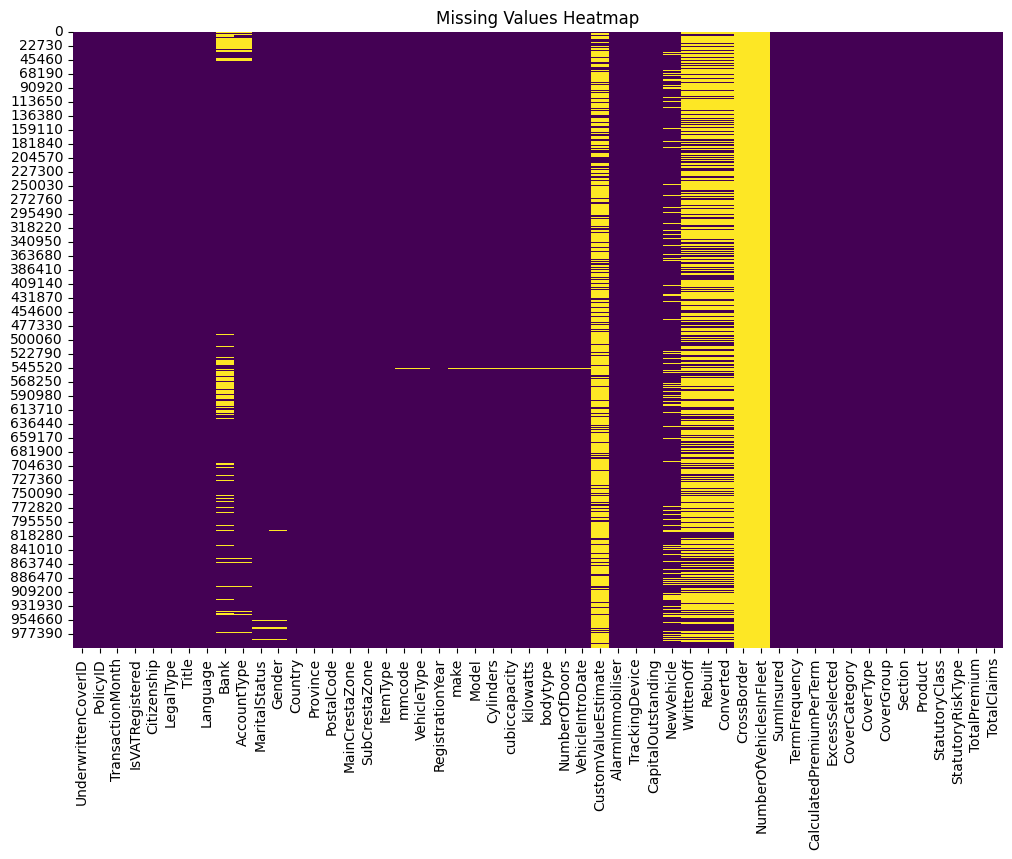

In [5]:
plot_missing_values(raw_df)

In [6]:
# Validate data types
validate_data_types(raw_df)

Potential data type issues:
- TransactionMonth: Likely categorical with 23 unique levels.
- IsVATRegistered: Unexpected data type: bool
- Citizenship: Likely categorical with 4 unique levels.
- LegalType: Likely categorical with 6 unique levels.
- Title: Likely categorical with 5 unique levels.
- Language: Likely categorical with 1 unique levels.
- Bank: Likely categorical with 11 unique levels.
- AccountType: Likely categorical with 3 unique levels.
- MaritalStatus: Likely categorical with 3 unique levels.
- Gender: Likely categorical with 3 unique levels.
- Country: Likely categorical with 1 unique levels.
- Province: Likely categorical with 9 unique levels.
- MainCrestaZone: Likely categorical with 16 unique levels.
- SubCrestaZone: Likely categorical with 45 unique levels.
- ItemType: Likely categorical with 1 unique levels.
- VehicleType: Likely categorical with 5 unique levels.
- make: Likely categorical with 46 unique levels.
- Model: Likely categorical with 411 unique levels.
-

In [7]:
cleaned_df = clean_data(raw_df, date_column='TransactionMonth')
df = cleaned_df
df

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000093,31520,389,2015-04-01,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000094,31520,389,2015-06-01,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000095,31520,389,2015-08-01,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000096,31519,389,2014-07-01,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,2.315000,0.0


In [8]:
output_path = r'../data/AlphaCare_Risk_Insurance_data.csv'
save_data(df, output_path)

In [9]:
# Check for missing values
missing_summary = missing_values_summary(df)
missing_summary

(NumberOfVehiclesInFleet    100.000000
 CrossBorder                 99.930207
 CapitalOutstanding          83.617605
 CustomValueEstimate         77.956560
 Rebuilt                     64.183810
 Converted                   64.183810
 WrittenOff                  64.183810
 Name: Missing (%), dtype: float64,
 NewVehicle          15.327998
 Bank                14.594670
 AccountType          4.022806
 MaritalStatus        0.825819
 VehicleIntroDate     0.055195
 NumberOfDoors        0.055195
 VehicleType          0.055195
 kilowatts            0.055195
 cubiccapacity        0.055195
 Cylinders            0.055195
 Model                0.055195
 make                 0.055195
 bodytype             0.055195
 mmcode               0.055195
 Name: Missing (%), dtype: float64)

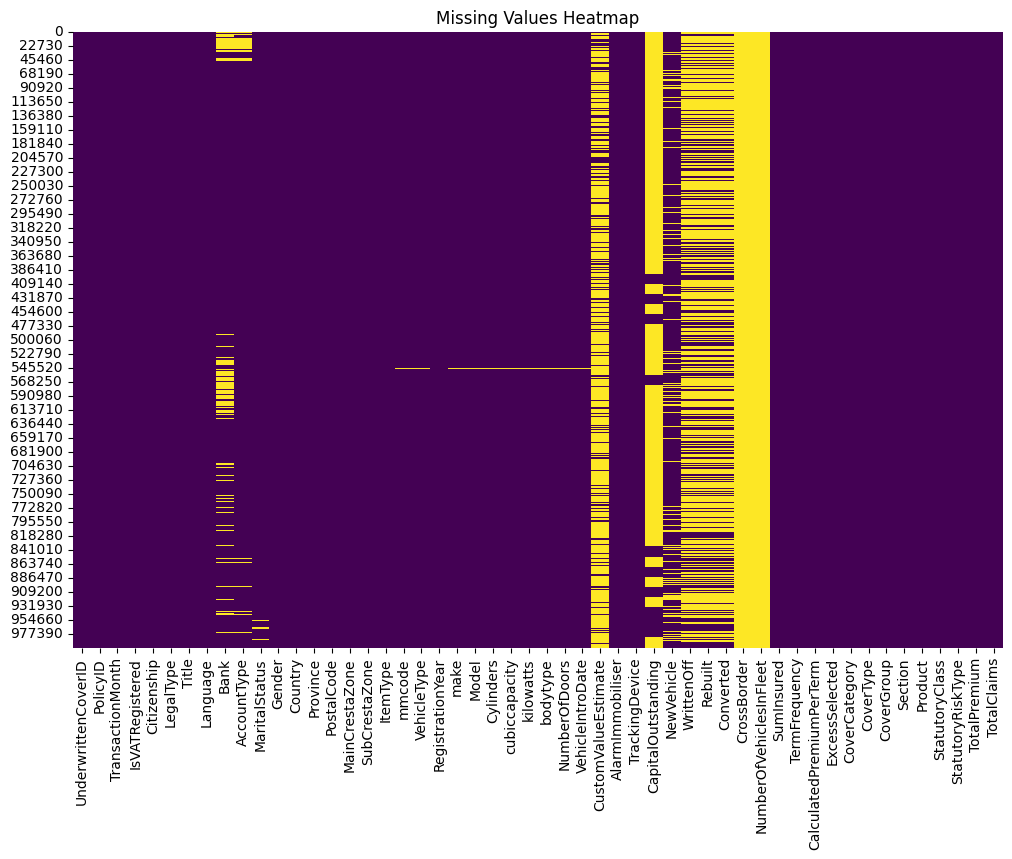

In [10]:
plot_missing_values(df)

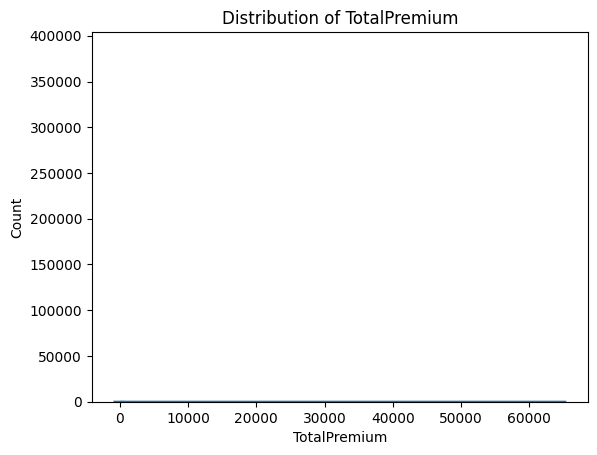

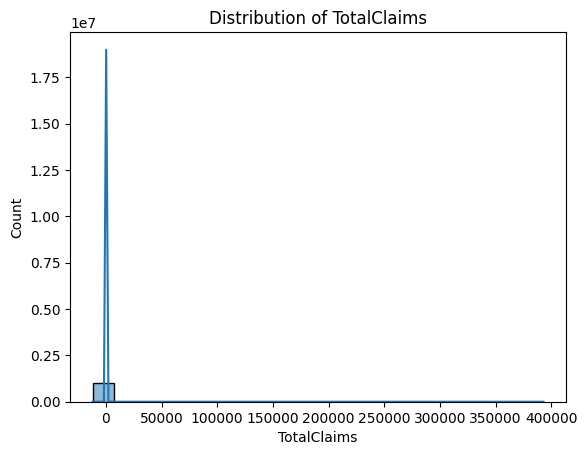

In [11]:
# Univariate Analysis for Numerical columns
num_cols = ['TotalPremium', 'TotalClaims']
for col in num_cols:
    plot_distribution(df, col)

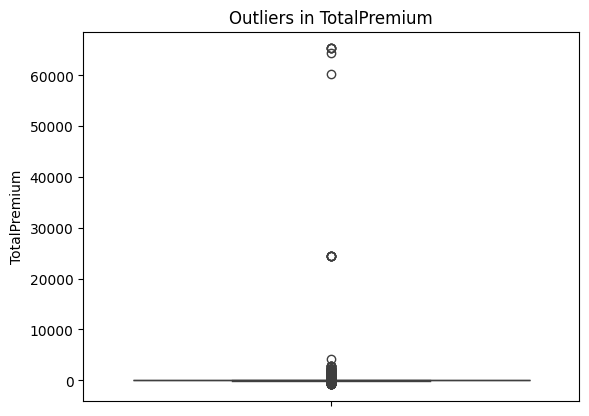

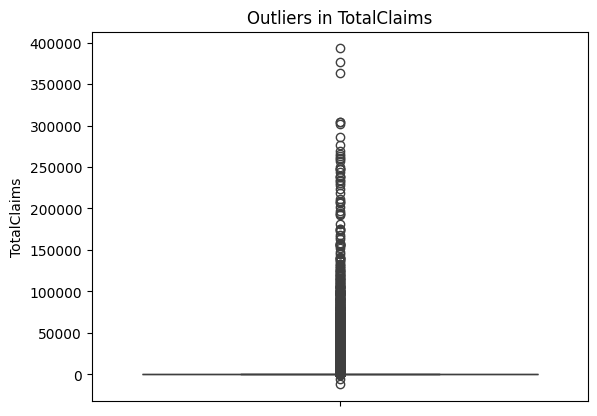

In [12]:
# Outlier Detection
for col in num_cols:
    plot_boxplot(df, col)

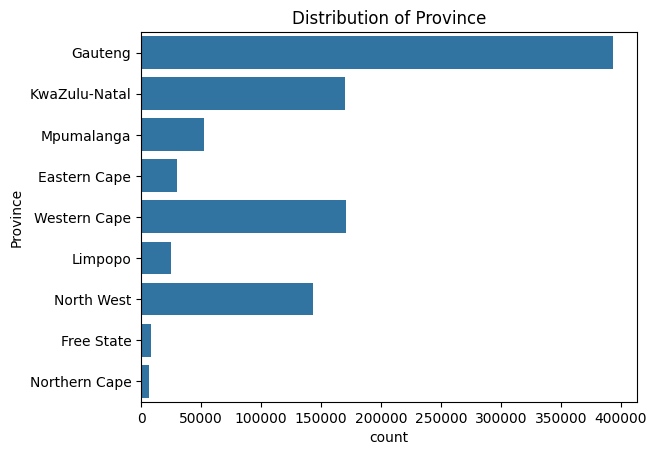

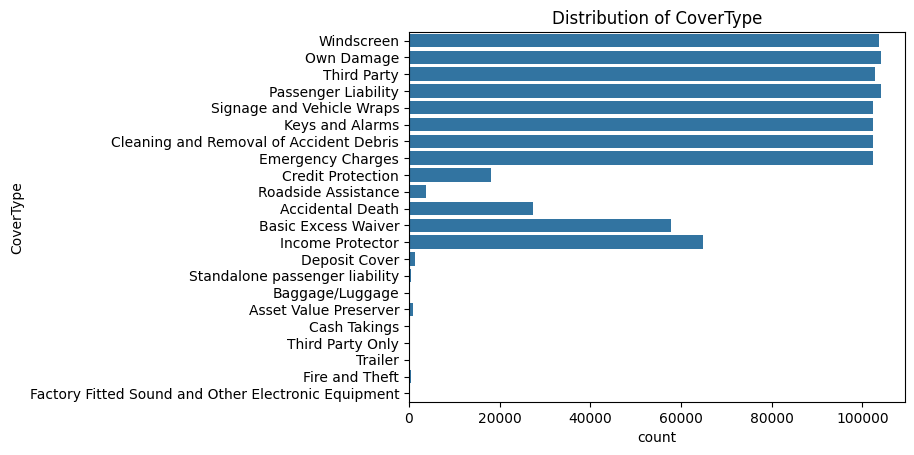

In [13]:
# Categorical columns
cat_cols = ['Province', 'CoverType']
for col in cat_cols:
    plot_counts(df, col)

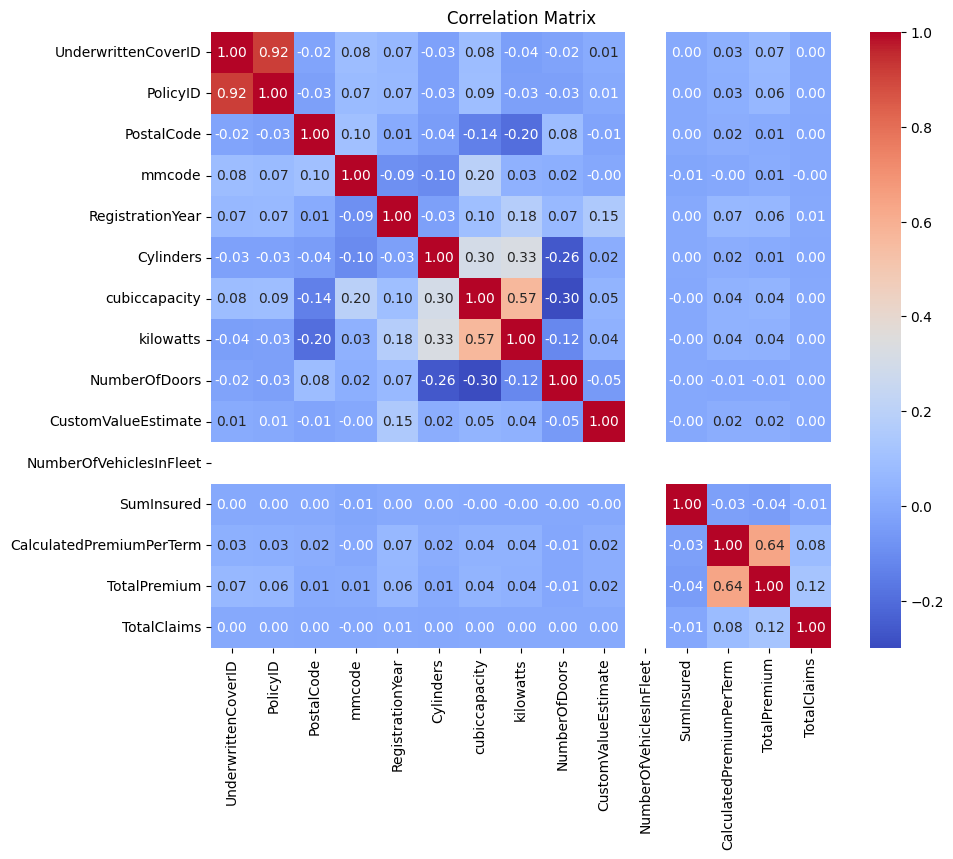

In [14]:
# Correlation Matrix
correlation_matrix(df)

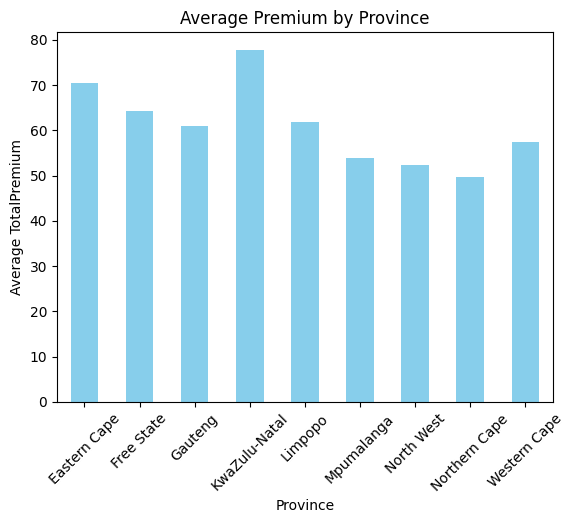

In [15]:
# Trends by Geography
bar_plot(data=df, group_col="Province", value_col="TotalPremium", title="Average Premium by Province", ylabel="Average TotalPremium", xlabel="")

c:\Users\Darkles\10academy\10Academy-Kifiya-Week-3\notebook\..\scripts\utils\visualizations.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x=x_column, y=y_column, hue=x_column, palette="viridis", legend=False, orient=orientation)


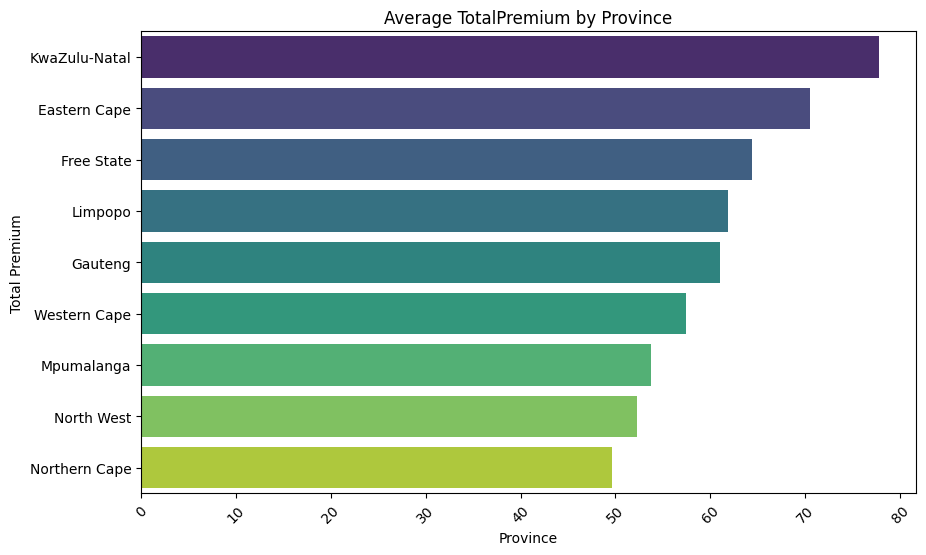

In [16]:
# Perform geographic trend analysis
mean_values = df.groupby('Province')['TotalPremium'].mean().sort_values(ascending=False)
plot_bar(data=mean_values, xlabel="Province", ylabel="Total Premium", title=f"Average TotalPremium by Province", orientation='h')

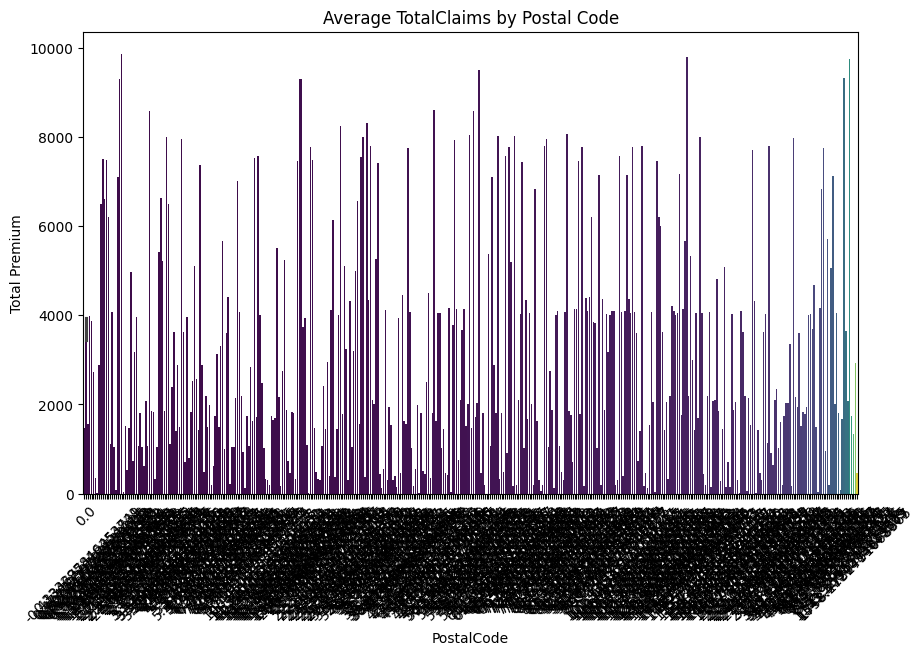

In [17]:
# Perform geographic trend analysis
mean_values = df.groupby('PostalCode')['TotalClaims'].mean().sort_values(ascending=False)
plot_bar(x_column=mean_values.values, y_column=mean_values.index, xlabel="PostalCode", ylabel="Total Premium", title="Average TotalClaims by Postal Code")

C:\Users\Darkles\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


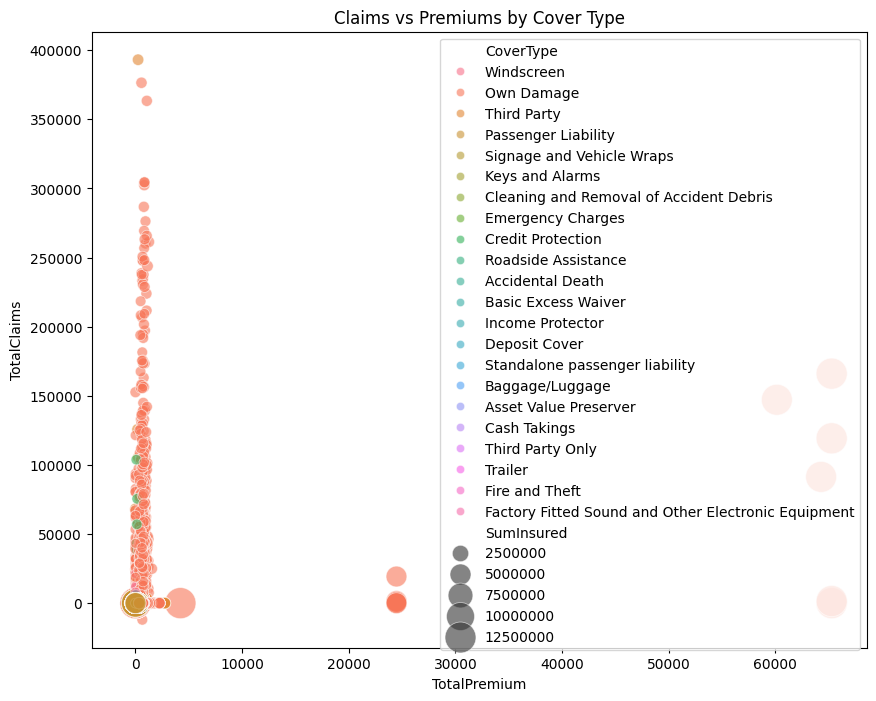

In [18]:
# Creative visualization (Bubble Chart)
bubble_chart(df, "TotalPremium", "TotalClaims", size="SumInsured", hue="CoverType", title="Claims vs Premiums by Cover Type")